# Wikipedia Pageview Data Analysis

### Importing Required Libraries

This section imports the necessary Python libraries to handle data processing and visualization. 

- **json**: A built-in Python module to handle JSON data, useful for working with API responses and saving results.
- **pandas**: A powerful library for data manipulation and analysis, widely used for handling tabular data.
- **matplotlib.pyplot**: A plotting library for creating visualizations, which is essential for presenting data insights.
- **inset_axes**: A utility from the `mpl_toolkits` module, used to add inset plots within larger figures to provide more detailed views of specific data points.

Ensure you have installed `pandas` and `matplotlib` using `pip` if they are not already available in your environment.


In [1]:
#
# These are standard python modules
import json
#
# You will need to install these with pip/pip3 if you do not already have it
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### Loading and Converting JSON Data

In this section, we load the pageview data stored in JSON format and convert it into pandas DataFrames for further analysis. 

- **Loading JSON Files**: The `json.load()` function reads the data from JSON files (for cumulative, desktop, and mobile views) into Python dictionaries. Each file contains pageview data collected through the Wikimedia Pageviews API, structured by article titles and access types.
  
- **Converting to DataFrames**: The JSON data is converted into pandas DataFrames, which allow for efficient manipulation, analysis, and visualization. DataFrames provide powerful tools for data operations such as filtering, grouping, and aggregating.

This ensures the raw data is now in a usable format for subsequent data processing and analysis.


In [2]:
# Load JSON files containing pageview data
with open('../data/rare-disease_monthly_cumulative_201507-202409.json') as f:
    cumulative_view_data = json.load(f)

with open('../data/rare-disease_monthly_desktop_201507-202409.json') as f:
    desktop_view_data = json.load(f)

with open('../data/rare-disease_monthly_mobile_201507-202409.json') as f:
    mobile_view_data = json.load(f)

# Convert JSON data into pandas DataFrames
df_cumulative = pd.DataFrame(cumulative_view_data)
df_desktop = pd.DataFrame(desktop_view_data)
df_mobile = pd.DataFrame(mobile_view_data)

### Parsing Timestamps and Analyzing Average Page Views

### Parsing Timestamps
The `timestamp` field in the data represents the date associated with the pageviews, but it is stored as a string in the format 'YYYYMMDD00'. To facilitate time-based operations, we use `pd.to_datetime()` to convert the timestamp strings into a proper `datetime` format, which enables easy manipulation and comparison of date-related data.

### Calculating Maximum and Minimum Average Page Views
- **Calculating Averages**: We compute the average page views per article using the `groupby()` method in pandas. The grouping is done by the article title, and the mean page views are calculated for both desktop and mobile access.
  
- **Identifying Extremes**: After calculating the average views, we identify the articles with the highest and lowest average views for both desktop and mobile access using the `.idxmax()` and `.idxmin()` functions. These functions return the article titles with the highest and lowest average views, respectively.

- **Filtering the Data**: We retrieve the data corresponding to these articles for further analysis and visualization, allowing us to focus on the articles with extreme (maximum and minimum) pageview patterns.


In [3]:
# Parse the 'timestamp' field into datetime format for easy manipulation
df_cumulative['timestamp'] = pd.to_datetime(df_cumulative['timestamp'], format='%Y%m%d00')
df_desktop['timestamp'] = pd.to_datetime(df_desktop['timestamp'], format='%Y%m%d00')
df_mobile['timestamp'] = pd.to_datetime(df_mobile['timestamp'], format='%Y%m%d00')

### MAXIMUM AND MINIMUM AVERAGE PAGE VIEWS
# Calculate the average views per article for desktop and mobile views
desktop_avg_views = df_desktop.groupby('article_title')['views'].mean()
mobile_avg_views = df_mobile.groupby('article_title')['views'].mean()

# Identify the articles with the highest and lowest average views for both access types
max_avg_desktop_article = desktop_avg_views.idxmax()
min_avg_desktop_article = desktop_avg_views.idxmin()

max_avg_mobile_article = mobile_avg_views.idxmax()
min_avg_mobile_article = mobile_avg_views.idxmin()

# Retrieve data corresponding to these articles
df_max_desktop = df_desktop[df_desktop['article_title'] == max_avg_desktop_article]
df_min_desktop = df_desktop[df_desktop['article_title'] == min_avg_desktop_article]
df_max_mobile = df_mobile[df_mobile['article_title'] == max_avg_mobile_article]
df_min_mobile = df_mobile[df_mobile['article_title'] == min_avg_mobile_article]

### Visualizing Maximum and Minimum Average Page Views

### Main Plot: Max and Min Average Views
This section initializes the main plot and visualizes the articles with the highest and lowest average page views for both desktop and mobile access types. The time series data for each article is plotted, and the following elements are added to enhance readability:
- **Axis Labels and Title**: Clearly label the x-axis (time) and y-axis (page views) to make the plot easy to interpret.
- **Legend**: A legend distinguishes between the articles with maximum and minimum page views for desktop and mobile access.
- **Grid**: A grid is added to the plot to make it easier to analyze the data points.

### Inset Plot: Zoomed-In View
An inset plot is added to provide a more detailed view of a specific time range (2021-2025). The inset focuses on articles with minimum page views, giving better visibility of the fluctuations in their data.
- **Custom Tick Labels and Zoom Limits**: The zoom limits and tick labels are customized to give a clearer view of the selected period.
- **Grid and Ticks**: Additional grid lines and ticks are added to improve clarity, and x-axis labels are rotated to avoid overlapping.

Finally, the plot is saved as a PNG image file for reproducibility and future reference.


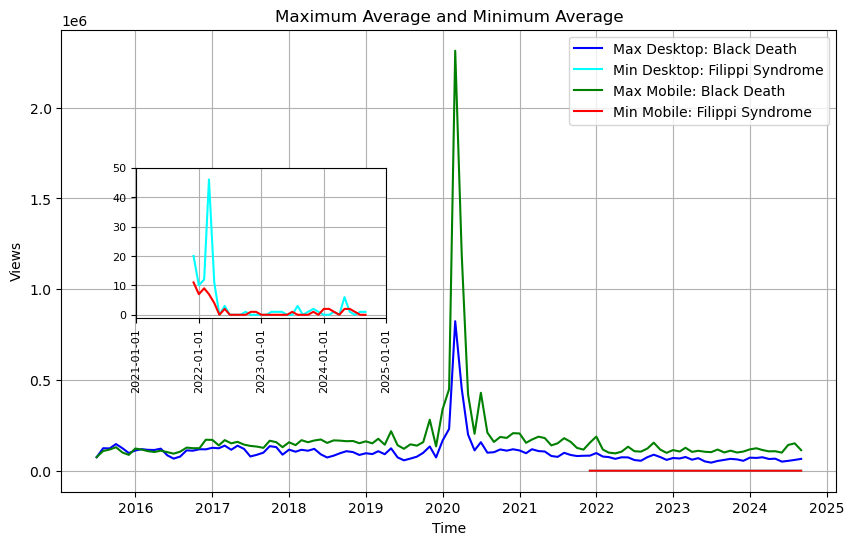

In [4]:
# Initialize the figure and main axis
fig, main_ax = plt.subplots(figsize=(10, 6))

# Plot the time series for the articles with max/min average views
main_ax.plot(df_max_desktop['timestamp'], df_max_desktop['views'], label=f'Max Desktop: {max_avg_desktop_article}', color='blue')
main_ax.plot(df_min_desktop['timestamp'], df_min_desktop['views'], label=f'Min Desktop: {min_avg_desktop_article}', color='cyan')
main_ax.plot(df_max_mobile['timestamp'], df_max_mobile['views'], label=f'Max Mobile: {max_avg_mobile_article}', color='green')
main_ax.plot(df_min_mobile['timestamp'], df_min_mobile['views'], label=f'Min Mobile: {min_avg_mobile_article}', color='red')

# Set title and axis labels for the main plot
main_ax.set_title('Maximum Average and Minimum Average')
main_ax.set_xlabel('Time')
main_ax.set_ylabel('Views')
main_ax.legend()
main_ax.grid(True)

# Create an inset plot for a zoomed-in view
inset_ax = fig.add_axes([0.2, 0.4, 0.25, 0.25])

# Plot data in the inset plot (zoomed in)
inset_ax.plot(df_min_desktop['timestamp'], df_min_desktop['views'], color='cyan')
inset_ax.plot(df_min_mobile['timestamp'], df_min_mobile['views'], color='red')

# Set zoom limits for the inset plot
inset_ax.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2025-01-01'))
inset_ax.set_ylim(-1, 50)

# Adjust the tick labels for clarity
inset_ax.xaxis.set_tick_params(labelsize=8)
inset_ax.yaxis.set_tick_params(labelsize=8)
inset_ax.grid(True)

# Set ticks on the x and y axes for the inset plot
inset_ax.set_xticks(pd.date_range('2021-01-01', '2025-01-01', freq='YS'))
inset_ax.set_yticks([0, 10, 20, 30, 40, 50])

# Rotate x-axis labels for better readability
plt.setp(inset_ax.get_xticklabels(), rotation=90)

# Save the plot to file
plt.savefig('../Max_and_Min_Average_Page_Requests_Over_Time.png')
plt.show()

### Visualizing Top 10 Peak Page Views

This section creates a visualization to showcase the articles with the highest peak page views for both desktop and mobile access types. The goal is to identify the articles that had the largest single-month spikes in user interest and compare their performance over time.

### Plotting the Top 10 Peak Articles
- **Desktop Articles**: We iterate over the top 10 desktop articles (identified in the previous step) and plot their page views using dashed lines for distinction.
- **Mobile Articles**: Similarly, we plot the top 10 mobile articles with solid lines to differentiate them from desktop articles. Each line represents the monthly page views for one article.
  
### Customizing the Plot
- **Title and Labels**: The plot is titled "Top 10 Peak Page Views," and both the x-axis (Time) and y-axis (Views) are labeled for clarity.
- **Legend**: A legend is included to help distinguish between the various articles, indicating whether they represent desktop or mobile access.
- **Grid**: A grid is added to the plot to improve readability and make it easier to compare trends across articles.

### Saving the Plot
The plot is saved as a PNG file, ensuring that it can be easily reproduced and referred to in future analysis.

This plot provides insights into which articles garnered the most attention during their peak periods and whether the peaks occurred similarly across desktop and mobile platforms. By visualizing both platforms in a single plot, we can observe how user engagement fluctuates across different devices.


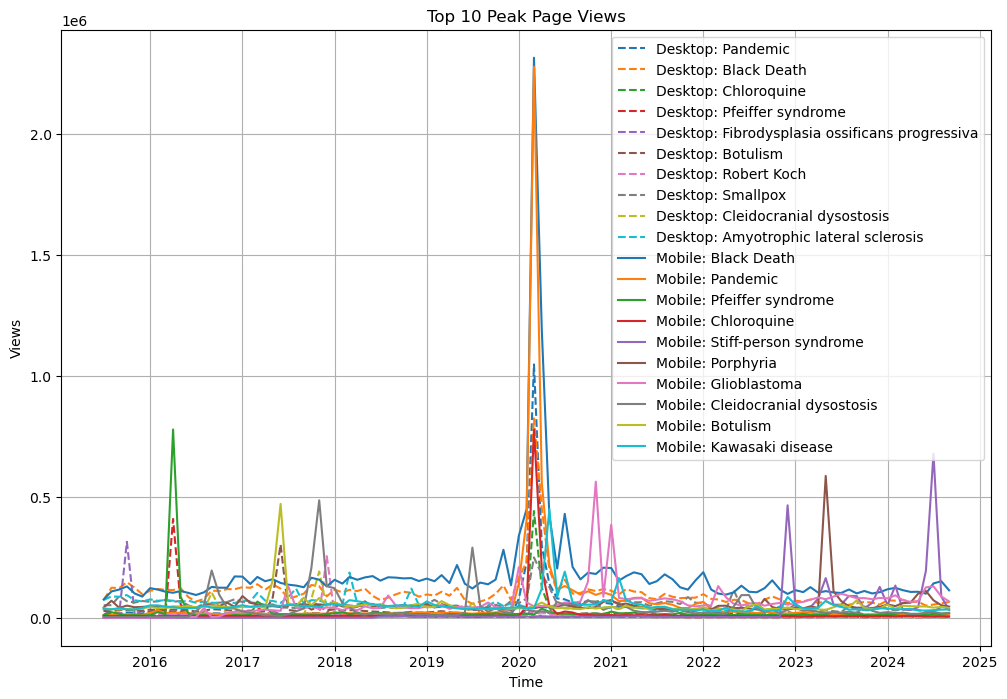

In [5]:
### TOP 10 PEAK PAGE VIEWS
# Find the top 10 articles by their peak page views
desktop_top_peak = df_desktop.groupby('article_title')['views'].max().nlargest(10)
mobile_top_peak = df_mobile.groupby('article_title')['views'].max().nlargest(10)

# Filter the data for these articles
df_desktop_top_10 = df_desktop[df_desktop['article_title'].isin(desktop_top_peak.index)]
df_mobile_top_10 = df_mobile[df_mobile['article_title'].isin(mobile_top_peak.index)]

# Plot the top 10 peak articles for desktop and mobile access
plt.figure(figsize=(12, 8))

for article in desktop_top_peak.index:
    data_desktop = df_desktop_top_10[df_desktop_top_10['article_title'] == article]
    plt.plot(data_desktop['timestamp'], data_desktop['views'], label=f'Desktop: {article}', linestyle='--')

for article in mobile_top_peak.index:
    data_mobile = df_mobile_top_10[df_mobile_top_10['article_title'] == article]
    plt.plot(data_mobile['timestamp'], data_mobile['views'], label=f'Mobile: {article}')

# Configure plot title and labels
plt.title('Top 10 Peak Page Views')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.savefig('../Top_10_Peak_Page_Views.png')
plt.show()

### Visualizing Articles with Fewest Months of Data

### Counting the Fewest Months of Data
In this section, we analyze which articles have the fewest number of months with recorded pageviews, both for desktop and mobile access types. The rationale behind this is to identify articles with incomplete or limited data coverage, which could be due to various reasons such as a late creation of the article or lack of consistent traffic data.

- **Counting Data Availability**: We use `groupby()` and `count()` to compute how many months of pageview data are available for each article. We then select the top 10 articles with the fewest months of data using `.nsmallest(10)`.
- **Filtering the Data**: The data is filtered to focus on the articles with the fewest months of available data for both desktop and mobile access.

### Plotting the Articles with Fewest Months of Data
- **Desktop and Mobile Data**: We plot the time series for these articles, with desktop data represented by dashed lines and mobile data by solid lines. Each line shows how the pageviews varied for these articles over the months where data is available.
  
### Customizing the Plot
- **Title and Labels**: The plot is titled "Articles with Fewest Months of Data (Desktop & Mobile)" and clearly labels the x-axis (Time) and y-axis (Views) to make the plot easy to interpret.
- **Grid**: A grid is added to the plot for better readability of the time series data.
  
### Adjusting and Positioning the Legend
- **Legend Placement**: The legend, which lists the article names and their corresponding line styles, is placed outside the plot to prevent it from overlapping with the data. This improves the overall presentation and readability of the plot.
  
### Saving the Plot
The plot is saved as a PNG file, making it easily reproducible and available for future reference or reports.

This section highlights articles that have incomplete data, providing insights into potential gaps in the dataset. Visualizing these trends helps to understand the temporal limitations of certain articles and ensure accurate interpretation of the results.


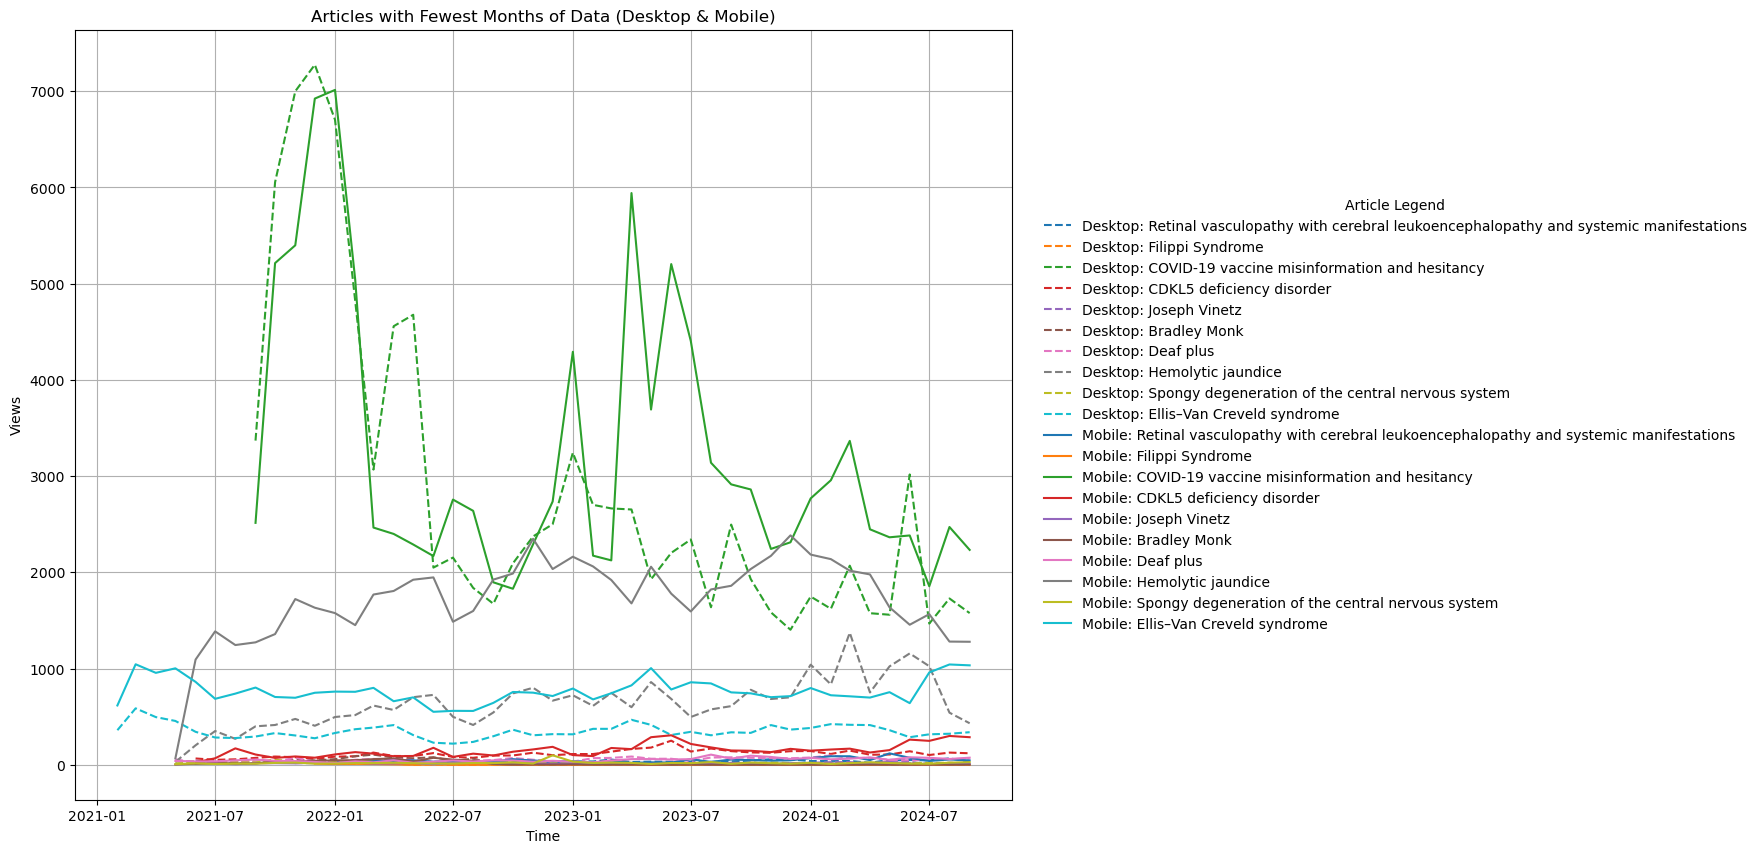

In [6]:
### ARTICLES WITH FEWEST MONTHS OF DATA
# Count the number of months available for each article
desktop_fewest_months = df_desktop.groupby('article_title')['timestamp'].count().nsmallest(10)
mobile_fewest_months = df_mobile.groupby('article_title')['timestamp'].count().nsmallest(10)

# Filter the data for these articles
df_desktop_fewest_10 = df_desktop[df_desktop['article_title'].isin(desktop_fewest_months.index)]
df_mobile_fewest_10 = df_mobile[df_mobile['article_title'].isin(mobile_fewest_months.index)]

# Create a new figure and axis for plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot desktop data with the fewest months of data
for article in desktop_fewest_months.index:
    data_desktop = df_desktop_fewest_10[df_desktop_fewest_10['article_title'] == article]
    ax.plot(data_desktop['timestamp'], data_desktop['views'], label=f'Desktop: {article}', linestyle='--')

# Plot mobile data with the fewest months of data
for article in mobile_fewest_months.index:
    data_mobile = df_mobile_fewest_10[df_mobile_fewest_10['article_title'] == article]
    ax.plot(data_mobile['timestamp'], data_mobile['views'], label=f'Mobile: {article}')

# Set plot title and labels
ax.set_title('Articles with Fewest Months of Data (Desktop & Mobile)')
ax.set_xlabel('Time')
ax.set_ylabel('Views')
ax.grid(True)

# Adjust layout to make space on the right for the legend
plt.subplots_adjust(right=0.75)  # Make space on the right side for the legend

# Position the legend outside the plot, to the right
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, title="Article Legend")

# Save the final plot
plt.savefig('../Articles_with_Fewest_Months_of_Data_Right_Legend.png', bbox_inches='tight')
plt.show()
